# EfficientNetLite0 Image Classification Model for CIFAR-100 Dataset
**Prerequisites:**
* Import [Dataset Images](https://github.com/YatharthDedhia/Eklavya-Smart-Stand/tree/Yatharth-programs/CIFAR-100_Dataset) to this Google colab session.

In [ ]:
!apt-get update && apt-get -qq install xxd

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1,540 kB]
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:14 http://archive.ubu

In [ ]:
!sudo apt -y install libportaudio2
!pip install -q tflite-model-maker

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  libportaudio2
0 upgraded, 1 newly installed, 0 to remove and 31 not upgraded.
Need to get 64.6 kB of archives.
After this operation, 215 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudio2 amd64 19.6.0-1 [64.6 kB]
Fetched 64.6 kB in 1s (66.5 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
import pandas as pd
import cv2
import pathlib
import pickle
import tensorflow as tf
import tensorflow.keras.layers as tfl
import tflite_model_maker
import logging
logging.getLogger("tensorflow").setLevel(logging.DEBUG)
from PIL import Image
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation
from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

%matplotlib inline

Load Dataset from the download images directory

In [ ]:
data = DataLoader.from_folder('/content/dataset')

INFO:tensorflow:Load image with size: 5945, num_label: 2, labels: 0, 1.


In [ ]:
train_data, test_data = data.split(0.8)

Plot the dataset images with respective labels

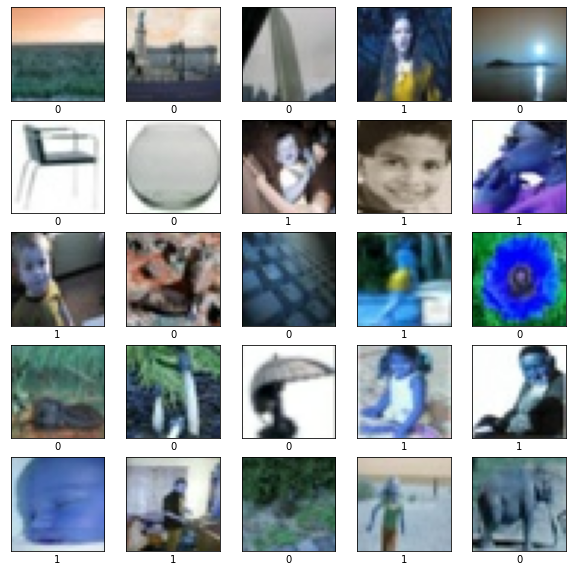

In [ ]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

## Change comments to select the pretrained models

In [ ]:
tflite_model_maker.image_classifier.EfficientNetLite0Spec(
    uri='https://tfhub.dev/tensorflow/efficientnet/lite0/feature-vector/2',
    compat_tf_versions=[1, 2],
    input_image_shape=[32,32],
    name='efficientnet_lite0'
)

# tflite_model_maker.image_classifier.EfficientNetLite1Spec(
#     uri='https://tfhub.dev/tensorflow/efficientnet/lite1/feature-vector/2',
#     compat_tf_versions=[1, 2],
#     input_image_shape=None,
#     name='efficientnet_lite1'
# )

# tflite_model_maker.image_classifier.EfficientNetLite2Spec(
#     uri='https://tfhub.dev/tensorflow/efficientnet/lite2/feature-vector/2',
#     compat_tf_versions=[1, 2],
#     input_image_shape=[260, 260],
#     name='efficientnet_lite2'
# )

# tflite_model_maker.image_classifier.EfficientNetLite3Spec(
#     uri='https://tfhub.dev/tensorflow/efficientnet/lite3/feature-vector/2',
#     compat_tf_versions=[1, 2],
#     input_image_shape=[280, 280],
#     name='efficientnet_lite3'
# )

# tflite_model_maker.image_classifier.EfficientNetLite4Spec(
#     uri='https://tfhub.dev/tensorflow/efficientnet/lite4/feature-vector/2',
#     compat_tf_versions=[1, 2],
#     input_image_shape=[300, 300],
#     name='efficientnet_lite4'
# )

# tflite_model_maker.image_classifier.MobileNetV2Spec(
#     uri='https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4',
#     compat_tf_versions=2,
#     input_image_shape=None,
#     name='mobilenet_v2'
# )

## Set Hyper-parameters

In [ ]:
model = tflite_model_maker.image_classifier.create(
    train_data,
    model_spec='efficientnet_lite0',
    validation_data=test_data,
    batch_size=32,
    epochs=10,
    steps_per_epoch=None,
    train_whole_model=None,
    dropout_rate=0.2,
    learning_rate=0.001,
    momentum=None,
    shuffle=False,
    use_augmentation=True,
    use_hub_library=True,
    warmup_steps=None,
    model_dir=None,
    do_train=True
)

INFO:tensorflow:Retraining the models...


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             3413024   
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 3,415,586
Trainable params: 2,562
Non-trainable params: 3,413,024
_________________________________________________________________
None


INFO:tensorflow:Use default resize_bicubic.
INFO:tensorflow:Use customized resize method bilinear
INFO:tensorflow:Use customized resize method bilinear


Epoch 1/10
148/148 [==============================] - 27s 101ms/step - loss: 0.6220 - accuracy: 0.6744 - val_loss: 0.4603 - val_accuracy: 0.8200
Epoch 2/10
148/148 [==============================] - 16s 107ms/step - loss: 0.5227 - accuracy: 0.7732 - val_loss: 0.4202 - val_accuracy: 0.8587
Epoch 3/10
148/148 [==============================] - 16s 108ms/step - loss: 0.5051 - accuracy: 0.7846 - val_loss: 0.4031 - val_accuracy: 0.8730
Epoch 4/10
148/148 [==============================] - 16s 109ms/step - loss: 0.4898 - accuracy: 0.8019 - val_loss: 0.3925 - val_accuracy: 0.8823
Epoch 5/10
148/148 [==============================] - 16s 107ms/step - loss: 0.4826 - accuracy: 0.8091 - val_loss: 0.3915 - val_accuracy: 0.8831
Epoch 6/10
148/148 [==============================] - 14s 94ms/step - loss: 0.4790 - accuracy: 0.8127 - val_loss: 0.3924 - val_accuracy: 0.8814
Epoch 7/10
148/148 [==============================] - 16s 107ms/step - loss: 0.4743 - accuracy: 0.8119 - val_loss: 0.3859 - val_acc

In [ ]:
model.summary()

In [ ]:
loss, accuracy = model.evaluate(test_data)

INFO:tensorflow:Use customized resize method bilinear


38/38 [==============================] - 4s 70ms/step - loss: 0.3762 - accuracy: 0.8957


## Show image classification results:

INFO:tensorflow:Use customized resize method bilinear


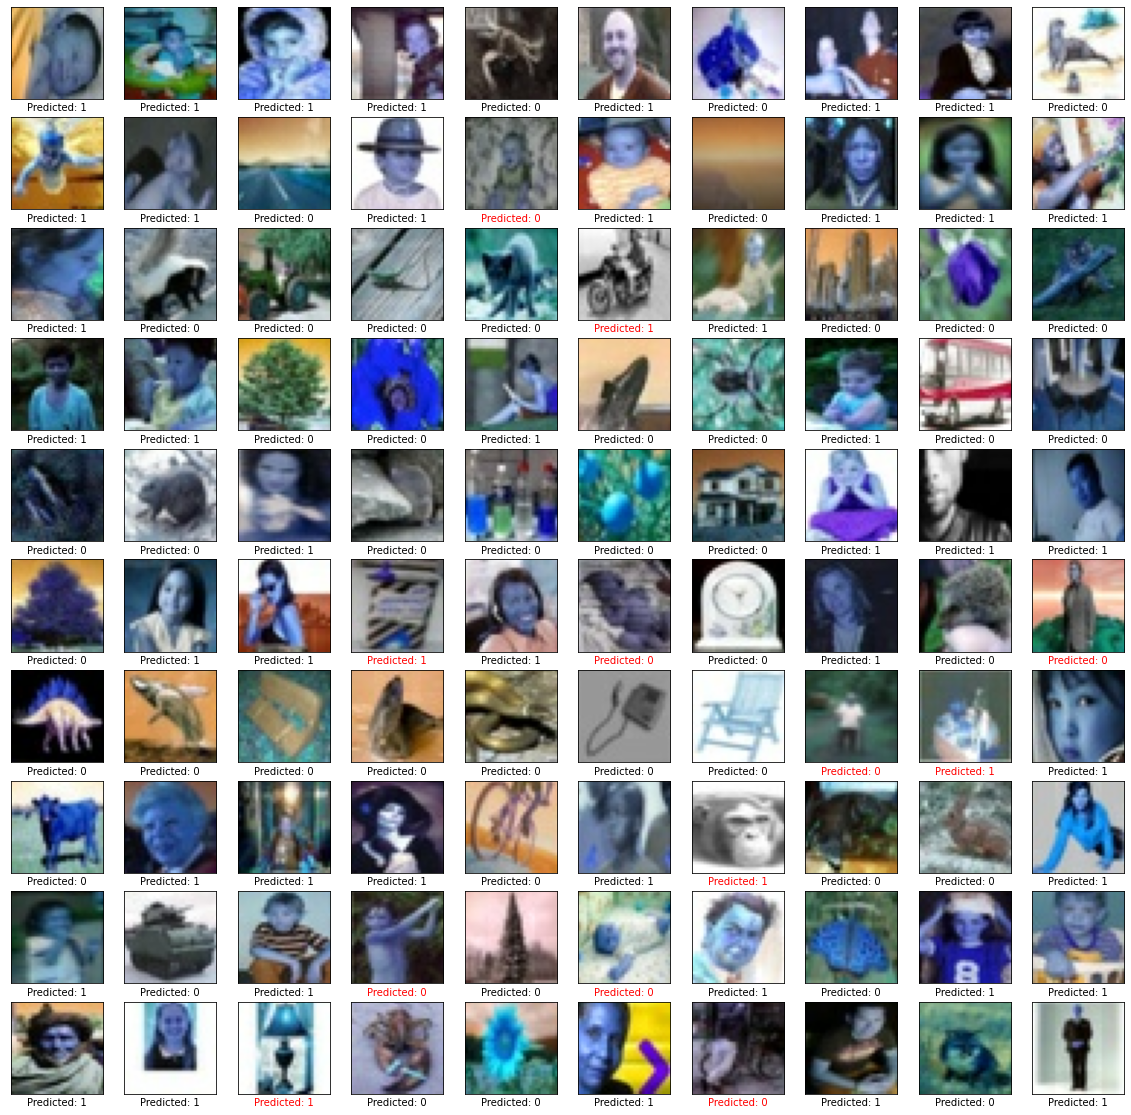

In [ ]:
# A helper function that returns 'red'/'black' depending on if its two input

# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

# Export Model

Export to SAVEDMODEL format

In [ ]:
model.export(export_dir='.', export_format=ExportFormat.SAVED_MODEL)

INFO:tensorflow:Assets written to: ./saved_model/assets


In [ ]:
tflite_models_dir = pathlib.Path("/content/")    
converter = tf.lite.TFLiteConverter.from_saved_model('/content/saved_model')

Export to .tflite format

In [ ]:
tflite_model = converter.convert()
tflite_model_file = tflite_models_dir/"effnet_model.tflite"
tflite_model_file.write_bytes(tflite_model)

13448816

## Apply float16 quantization

In [ ]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]

Export quantized .tflite model

In [ ]:
tflite_fp16_model = converter.convert()
tflite_model_fp16_file = tflite_models_dir/"effnet_model_quant_f16.tflite"
tflite_model_fp16_file.write_bytes(tflite_fp16_model)

6762276

In [ ]:
MODELS_DIR = '/EfficientNetLite0/'
if not os.path.exists(MODELS_DIR):
    os.mkdir(MODELS_DIR)
# MODEL_TF = MODELS_DIR + 'model'
MODEL_NO_QUANT_TFLITE = MODELS_DIR + 'model.tflite'
MODEL_TFLITE = MODELS_DIR + 'effnet_model_quant_f16.tflite'
MODEL_TFLITE_MICRO = MODELS_DIR + 'model.cc'

Export model as C Array (.cc) file

In [ ]:
# Convert to a C source file, i.e, a TensorFlow Lite for Microcontrollers model
!xxd -i {MODEL_TFLITE} > {MODEL_TFLITE_MICRO}
# Update variable names
REPLACE_TEXT = MODEL_TFLITE.replace('/', '_').replace('.', '_')
!sed -i 's/'{REPLACE_TEXT}'/g_model/g' {MODEL_TFLITE_MICRO}